# Text_Preprocessing_and_Sentiment_Analysis

### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.


## IMPORTS and view

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/trum_tweet_sentiment_analysis.csv')

In [3]:
df.head()

,text,Sentiment
0,RT @JohnLeguizamo: #trump not draining swamp b...,0
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,0
2,Trump protests: LGBTQ rally in New York https:...,1
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",0
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,0


In [5]:
df_text=df['text']

In [6]:
df_text.dropna()

,text
0,RT @JohnLeguizamo: #trump not draining swamp b...
1,ICYMI: Hackers Rig FM Radio Stations To Play A...
2,Trump protests: LGBTQ rally in New York https:...
3,"""Hi I'm Piers Morgan. David Beckham is awful b..."
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...
...,...
1850118,Everytime im like 'How the fuck I follow Melan...
1850119,RT @imgur: The Trump Handshake. https://t.co/R...
1850120,"""Greenspan warns Trump's policies risk inflati..."
1850121,RT @FasinatingLogic: We must also #INVESTIGATE...


## text normalisation

In [52]:
import re
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  text = url_pattern.sub(r'', text)
  return text


In [40]:
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [41]:
def removeunwanted_characters(document):
  """
  This function will remove all the unwanted characters from the input dataset.
  Input Args:
  documet: A text data to be cleaned.
  Return:
  A cleaned document.
  """
  # remove user mentions
  document = re.sub("@[A-Za-z0-9_]+"," ", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  #remove emojis
  document = remove_emoji(document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()

In [42]:
text_removed_unwanted = df_text.apply(removeunwanted_characters)

In [43]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
  """
  This function removes the punctutations present in our text data.
  Input Args:
  text: text data.
  Returns:
  text: cleaned text.
  """
  tokenizer = RegexpTokenizer(r"\w+")
  lst=tokenizer.tokenize(' '.join(text))
  return lst


In [45]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
def remove_stopwords(text_tokens):
  """
  This function removes all the stopwords present in out text tokens.
  Input Args:
  text_tokens: tokenize input of our datasets.
  Returns:
  result_tokens: list of token without stopword.
  """

  result_tokens = []
  for token in text_tokens:
    if token not in stop_words:
       result_tokens.append(token)
  return result_tokens

In [47]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(token_text):
  """
  This function performs the lemmatization operations as explained above.
  Input Args:
  token_text: list of tokens.
  Returns:
  lemmatized_tokens: list of lemmatized tokens.
  """
  lemma_tokens = []
  wordnet = WordNetLemmatizer()
  lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in token_text]

  return lemmatized_tokens


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
from nltk.stem import PorterStemmer

def stemming(text):
  """
  This function performs stemming operations.
  Input Args:
  token_text: list of tokenize text.
  Returns:
  stemm_tokes: list of stemmed tokens.
  """
  porter = PorterStemmer()
  stemm_tokens = []
  for word in text:
    stemm_tokens.append(porter.stem(word))
  return stemm_tokens

In [49]:
def lower_order(text):
  """
  This function converts all the text in input text to lower order.
  Input Args:
  token_text : input text.
  Returns:
  small_order_text : text converted to small/lower order.
  """
  def lower_order(text):
         text = text.astype(str)  # Convert to strings
         small_order_text = text.lower()
         return small_order_text

# # Test:
# sample_text = "@This Is some Normalized TEXT"
# sample_small = lower_order(sample_text)
# print(sample_small)

## text normailisation pipeline
### try 1 on whole dataset
Error: Cannot work on series for most functions, expects strings

In [57]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  """
  This...
  """
  # dataset = dataset.fillna('')

  # Convert the input to small/lower order.
  data = lower_order(dataset)
  # Remove URLs
  data = remove_urls(data)
  # Remove emojis
  data = remove_emoji(data)
  # Remove all other unwanted characters.
  data =  removeunwanted_characters(data)
  # Create tokens.
  tokens = data.split()
  # Remove stopwords:
  tokens = remove_stopwords(tokens)
  # Stemming or lemmatization:
  if rule == "lemmatize":
    tokens = lemmatization(tokens)
  elif rule == "stem":
    tokens = stemming(tokens)
  else:
    print("Pick between lemmatize or stem")


  return " ".join(tokens)



In [59]:
text_cleaning_pipeline(df_text) # passing dataframe whole fails

TypeError: expected string or bytes-like object, got 'NoneType'

## Text normalisation pipeline
 ### try2 on individual text instead of dataset

In [32]:
import string
import nltk
nltk.download('punkt_tab')

def text_cleaning_pipeline(text,rule = "lemmatize"):
    text = text.lower()  # Lowercasing
    text = re.sub(r"http\\\S+|www\\S+|https\\S+", '', text)  # Remove URLs
    text = re.sub(r'@\\w+', '', text)  # Remove mentions
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)
    if rule == "lemmatize":
      tokens = lemmatization(tokens)
    elif rule == "stem":
      tokens = stemming(tokens)
    else:
      print("Pick between lemmatize or stem")
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(filtered_tokens)

df['clean_text'] = df['text'].apply(text_cleaning_pipeline)
df[['text', 'clean_text']].head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,clean_text
0,RT @JohnLeguizamo: #trump not draining swamp b...,rt johnleguizamo trump drain swamp taxpayer do...
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,icymi hackers rig fm radio station play antitr...
2,Trump protests: LGBTQ rally in New York https:...,trump protest lgbtq rally new york bbcworld via
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",hi im piers morgan david beckham awful donald ...
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,rt tech firm sue buzzfeed publish unverified t...


## test train split to sentiment analysis

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=42)


## Tf idf vectorization

In [67]:
# tf-idf vectorization
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## model train and evaluation

In [38]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    248563
           1       0.90      0.86      0.88    121462

    accuracy                           0.92    370025
   macro avg       0.91      0.90      0.91    370025
weighted avg       0.92      0.92      0.92    370025



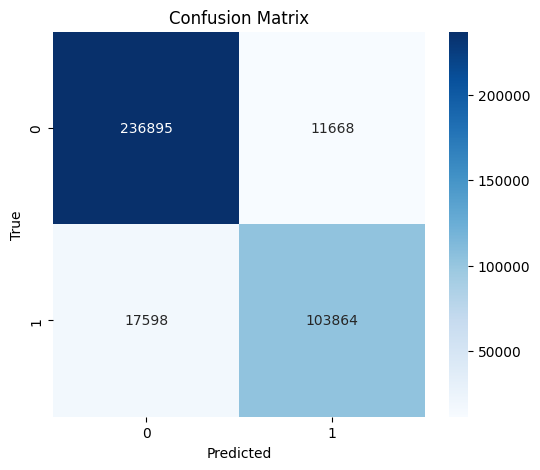

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


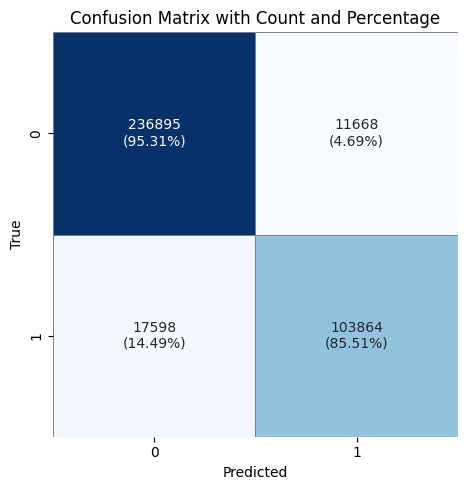

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix and percentages
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Combine count and percentage into a single annotation string
labels = np.array([
    [f'{count}\n({percent:.2f}%)' for count, percent in zip(row_counts, row_percents)]
    for row_counts, row_percents in zip(cm, cm_percentage)
])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_,
            cbar=False, square=True, linewidths=0.5, linecolor='gray')

# Axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Count and Percentage')
plt.tight_layout()
plt.show()
